#### Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

#### Read in Automobiles Dataset

In [2]:
df = pd.read_csv("automobiles.csv", index_col=0, na_values=["?"])

# Drop rows with missing value for price
df.dropna(subset=["price"], axis=0, inplace = True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Descriptive Statistics Describe()

In [3]:
# Summarize statistics for automobile dataset
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Formatting Value_Counts()

In [4]:
# Summarize categorical data of drive-wheels with value counts
drive_wheels_counts = df["drive-wheels"].value_counts()

drive_wheels_counts.rename(columns={"drive-wheels":"value_counts"}, implace=True)
drive_wheels_counts.indexname = "drive-wheels"

print(drive_wheels_counts)

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


### Box Plot Example

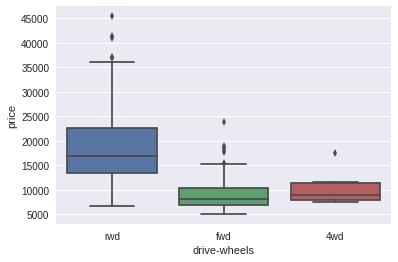

In [5]:
sns.boxplot(x="drive-wheels", y="price", data=df)

### Scatter Plot Example

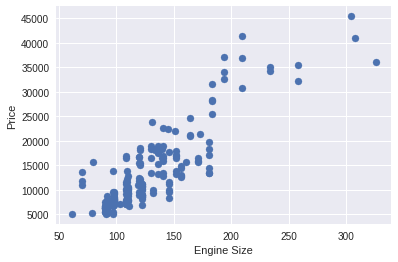

In [6]:
y=df["price"]
x=df["engine-size"]
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.scatter(x,y)

### Grouping Data Groupby()

In [7]:
df_test = df.ix[:, ["drive-wheels", "body-style", "price"]]
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### Pivot Table Example

In [9]:
# Convert grouped data from above to pivot table
df_pivot = df_grp.pivot(index="drive-wheels", columns="body-style")

df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Heatmap Example

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/usr/lib/python3/dist-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


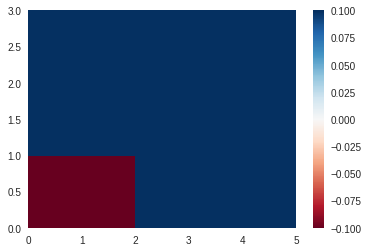

In [46]:
# Convert pivot table above to heatmap

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

### ANOVA Example

In [59]:
# ANOVA between "Honda" and "Subaru"
df_anova=df[["make", "price"]]
grouped_anova=df_anova.groupby(["make"])

anova_results_1=stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])

print("F-Test:  ", anova_results_1[0])
print("P-Value: ", anova_results_1[1])

F-Test:   0.19744030127462606
P-Value:  0.6609478240622193


### Regression Correlation Example

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Positive Correlation:



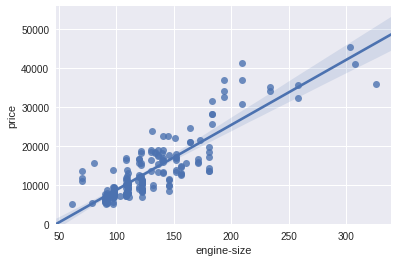

Negative Correlation:



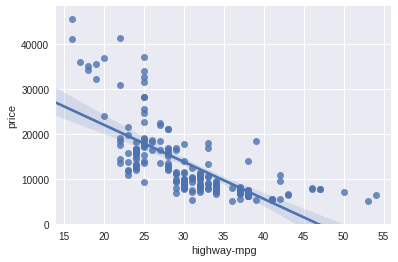

Weak Correlation:



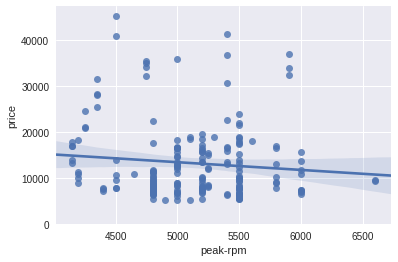

In [64]:
# Correlation between "engine-size" and "price"
sns.regplot (x = "engine-size", y="price", data=df)
plt.ylim(0,)
print ("Positive Correlation:\n")
plt.show()

sns.regplot (x = "highway-mpg", y="price", data=df)
plt.ylim(0,)
print ("Negative Correlation:\n")
plt.show()

sns.regplot (x = "peak-rpm", y="price", data=df)
plt.ylim(0,)
print ("Weak Correlation:\n")
plt.show()

### Pearson Correlaton Example

In [80]:
# Pearson correlation between "horsepower" and "price"
Pearson_coef,p_value = stats.pearsonr(df["horsepower"],df["price"])

print("Pearson correlation: ", Pearson_coef)
print("P-value: ", p_value)

Pearson correlation:  nan
P-value:  1.0


/usr/lib/python3/dist-packages/scipy/stats/stats.py:5084: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
